# Review of Optimization

Let's suppose we want to minimize the following function:

$$
f(x) = x^2.
$$


One way to do this is to compute its derivative and find the points where the derivative is zero:

$$ 
f'(x) = 2x
$$

Setting the derivative equal to zero, we find:

$$
2x = 0 \Rightarrow x = 0
$$

So the minimum of the function is achieved at point x = 0.

But for complex functions, finding the minimum analytically might be particularly hard or even impossible. Here is where the algorithm of gradient descent comes in handy. 

**Gradient Descent** is an optimization algorithm used to find the values of parameters, which minimize a cost function. **It's an iterative approach to finding the minimum of a function**. 

Here's how the gradient descent algorithm works:

1. Choose initial guess $x^{(0)}$ and learning rate $\alpha$.
2. Update $x^{(t)}$ with the rule $x^{(t+1)} = x^{(t)} - \alpha \nabla f(x^{(t)})$ until convergence.

* The intuition behind this algorithm is that we start with a guess for the minimum of the function, and then we move this guess downhill until we reach a point where the gradient is zero, signaling that we have reached a minimum. With a small step size, we should have $f(x^{(t+1)}) \leq f(x^{(t)})$, so repeating this process should eventually converge to a (local) minimum (or saddle point).
  
* The learning rate, often denoted by $\alpha$, is a hyper-parameter that determines the step size at each iteration while moving toward a minimum of a loss function. Also, the $\nabla$ symbol represents the derivative (also called gradient).
  
Given our function $f(x) = x^2$, the update rule becomes:

$$ 
x^{(t+1)} = x^{(t)} - \alpha * 2 * x^{(t)}
$$

From this process, we can pick a point, calculate the gradient at that point, subtract some multiple of the gradient from the point's coordinates to find the new point, and repeat the process until we find a point where the gradient is near zero, signaling that the minimum of the function has been found.

The advantage of this approach is that we only need to compute the derivative (or gradient) at one point at a time, rather than needing to solve the equation for the derivative equal to zero.

Remember, to use gradient descent effectively, you should probably spend some time tuning the learning rate because if the learning rate is too small, then convergence will be excessively slow, but if the learning rate is too large you might skip the optimal solution or might not converge at all. 

In conclusion, that's how gradient descent algorithm works, a useful iterative method for finding the local minimum of differentiable functions. It provides a general approach to optimizing complex functions, and it's the backbone of many machine learning algorithms.

### Python implementation

In [41]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [42]:
# define the function
def f(x):
    return x**2

# define the derivative of the function
def df(x):
    return 2*x

In [43]:
# gradient descent function
def gradient_descent(learning_rate, x_start, num_iterations):
    x = x_start
    history = [x] # to store the trajectory of each iteration

    for i in range(num_iterations):
        x = x - learning_rate * df(x) 
        history.append(x)
    
    return history

In [48]:
# parameters
x_start = -5  # initial guess
learning_rate = 0.2
num_iterations = 20

# perform gradient descent
trajectory = gradient_descent(learning_rate, x_start, num_iterations)

In [49]:
trajectory

[-5,
 -3.0,
 -1.7999999999999998,
 -1.0799999999999998,
 -0.6479999999999999,
 -0.3887999999999999,
 -0.23327999999999993,
 -0.13996799999999995,
 -0.08398079999999997,
 -0.05038847999999998,
 -0.030233087999999984,
 -0.018139852799999988,
 -0.010883911679999993,
 -0.006530347007999996,
 -0.0039182082047999976,
 -0.0023509249228799984,
 -0.001410554953727999,
 -0.0008463329722367994,
 -0.0005077997833420796,
 -0.0003046798700052478,
 -0.00018280792200314866]

In [50]:
# plot the function with the trajectory
def plot_function_trajectory(trajectory):
    x = np.linspace(-6, 6, 400)
    y = f(x)

    plt.figure(figsize=[10,5])
    plt.plot(x, y, label=r'$f(x)=x^2$')

    colors = cm.rainbow(np.linspace(0, 1, len(trajectory)))
    plt.scatter(trajectory, [f(i) for i in trajectory], color=colors)

    plt.title('Gradient Descent Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

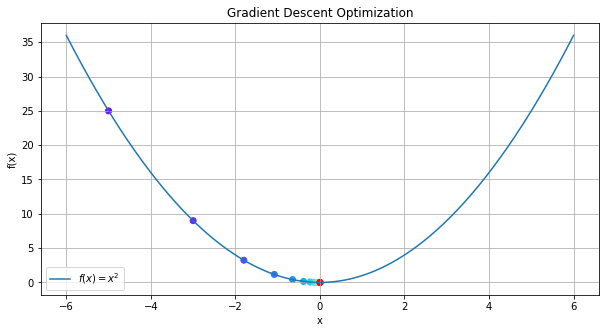

In [51]:
plot_function_trajectory(trajectory)

We see that the last point is very close to zero (gradient descent converged to the minimum)

**Exercise** What happens if we change the learning rate to 0.01?

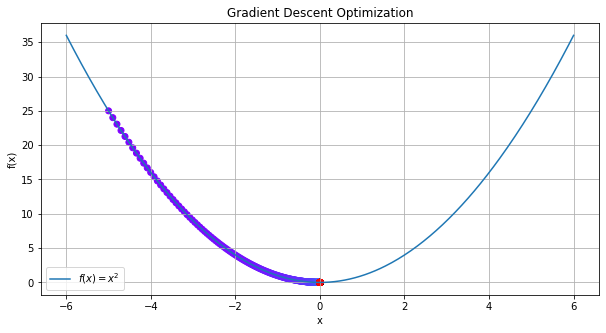

In [54]:
# parameters
x_start = -5  # initial guess
learning_rate = 0.01
num_iterations = 2000

# perform gradient descent
trajectory = gradient_descent(learning_rate, x_start, num_iterations)

plot_function_trajectory(trajectory)

**Exercise** What happens if we change the learning rate to 1.5?

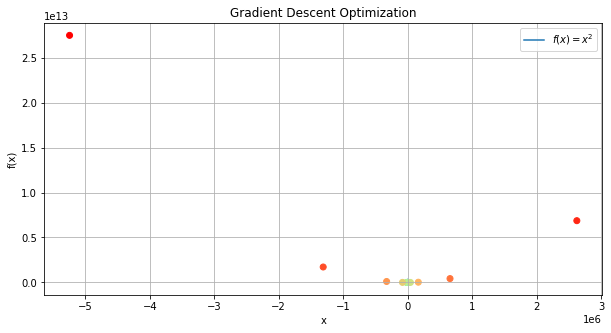

In [55]:
# parameters
x_start = -5  # initial guess
learning_rate = 1.5
num_iterations = 20

# perform gradient descent
trajectory = gradient_descent(learning_rate, x_start, num_iterations)

plot_function_trajectory(trajectory)







### Review of gradients of multivariate functions

The same ideas can be applied to functions of multiple variables. For example, consider the function $f : \mathbb{R}^3 \rightarrow \mathbb{R}$ defined by:

$$
f(x, y, z) = x^2 + 3y^2 + 5z^2
$$

The gradient of this function is a vector of three components (since the function has three variables), in which each component is the partial derivative of the function with respect that variable. In this case, we have:

$$
\nabla f(x, y, z) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z} \right) = (2x, 6y, 10z)

Note: Since the gradient has the same number of components as the inputs of the function, we can still apply the same idea of gradient descent to find the minimum of the function. The only difference is that now we need to update all the components of the input vector at the same time. For example, if we start with an initial guess $(x^{(0)}, y^{(0)}, z^{(0)})$, then the update rule becomes:

$$
(x^{(t+1)}, y^{(t+1)}, z^{(t+1)}) = (x^{(t)}, y^{(t)}, z^{(t)}) - \alpha \nabla f(x^{(t)}, y^{(t)}, z^{(t)})
$$

# Automatic Differentiation

Automatic Differentiation (AD), also known as algorithmic differentiation or computational differentiation, is a set of techniques to numerically evaluate the derivative of a function specified by a computer program. 

AD exploits the fact that every computer program, no matter how complex, executes a sequence of elementary arithmetic operations such as addition, subtraction, multiplication, division, etc., and elementary functions such as exp, log, sin, cos, etc. By applying the chain rule repeatedly to these operations, derivatives of arbitrary order can be computed automatically, accurately to working precision, and using at most a small constant factor more arithmetic operations than the original program.

![image](https://www.aws.ps/wp-content/uploads/2020/01/tensorflow-vs-pytorch.png)

The most popular libraries for AD are TensorFlow and PyTorch.

* TensorFlow, developed by Google https://www.tensorflow.org
* PyTorch, developed by Meta (Facebook) https://pytorch.org

![image](images/comparison.png)

In this course, we will mainly focus on Pytorch, since it is more flexible and has gained more popularity in the recent years (which means more support).

You can install following the instructions in the official website:

https://pytorch.org/get-started/locally/

which typically just involves running the following command:

```bash
pip install torch
```

In [57]:
import torch
import numpy as np

### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for automatic differentiation (more on this later). The name “tensor” is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well.

In [58]:
x = torch.Tensor([[1, 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [59]:
x = torch.zeros(10)
x

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [60]:
x = torch.randn(3, 3)
x

tensor([[ 0.9499, -0.2473, -0.4399],
        [-0.8217,  1.3747, -0.7969],
        [-0.5173,  0.9696,  0.3041]])

You can obtain the shape of a tensor in the same way as in numpy (x.shape)

In [61]:
x.shape

torch.Size([3, 3])

### Tensor to Numpy, and Numpy to Tensor

Tensors can be converted to numpy arrays, and numpy arrays back to tensors. To transform a numpy array into a tensor, we can use the function `torch.from_numpy`:

In [62]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


To transform a PyTorch tensor back to a numpy array, we can use the function `.numpy()` on tensors:

In [63]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


### Operations and Indexing

Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the PyTorch documentation, https://pytorch.org/docs/stable/tensors.html#

In [64]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 1)  # notice the broadcasting in the last dimension, similar to numpy

y = x1 + x2
y

tensor([[1.1162, 0.7587, 0.7166],
        [1.1841, 1.4881, 1.7161]])

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let’s try it:

In [65]:
y[0:2, 0:1]  # first two rows, first column

tensor([[1.1162],
        [1.1841]])

In [66]:
# it's the same as 
# (you can avoid writing the 0's)
y[:, :1]

tensor([[1.1162],
        [1.1841]])

### Automatic Differentiation with PyTorch

One of the main reasons for using PyTorch in Machine/Deep Learning is that **we can automatically get gradients/derivatives of functions** that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients:

In [67]:
x = torch.ones(3)
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()`. 
Alternatively, when creating a tensor, you can pass the argument `requires_grad=True`` to most initializers we have seen above.

In [12]:
# these two are the same:
x = torch.ones(3, requires_grad=True)
x

tensor([1., 1., 1.], requires_grad=True)

In [13]:
x = torch.ones(3)
x.requires_grad_(True)

tensor([1., 1., 1.], requires_grad=True)

Let's say we now want to compute the gradient of the function

$$
y = f(x) = \sum_{i=0}^2 (x_i + 1)^2
$$

with respect to the input $x = (x_0, x_1, x_2) = (1, 1, 1)\in \mathbb{R}^3$. 

We can do this automatically as follows:

**1. Let's build the operations that define the function $f(x)$ step by step:**

In [14]:
a = x + 1  # add 1 to each element of the vector x
b = a ** 2 # square each element of the vector a
# now we sum all the components:
y = b.sum()

In [15]:
y

tensor(12., grad_fn=<SumBackward0>)

So $f((1, 1, 1)) = 12$. 

But what we really want is the derivative: $\nabla_x f((1, 1, 1))$.

**2. Call the backward method on the output tensor (it computes the gradient of all the variables using the chain rule):**

In [16]:
y.backward()

**3. Now we can access the gradient of $f$ with respect to $x$ by calling the `grad` attribute of $x$:**

In [17]:
x.grad

tensor([4., 4., 4.])

So there is no need to compute the derivatives by hand, PyTorch does it for us!

**Exercise:** Compute $\nabla_x f((0, 1, 2))$

In [21]:
x = torch.Tensor([0., 1, 2])
x.requires_grad_(True)

a = x + 1  # add 1 to each element of the vector x
b = a ** 2 # square each element of the vector a
# now we sum all the components:
y = b.sum()
y

tensor(14., grad_fn=<SumBackward0>)

In [22]:
y.backward()

print("The gradient is",x.grad)

The gradient is tensor([2., 4., 6.])


**Exercise:** Compute $\nabla_x f^2((0, 1, 2))$

In [23]:
x = torch.Tensor([0., 1, 2])
x.requires_grad_(True)

a = x + 1  # add 1 to each element of the vector x
b = a ** 2 # square each element of the vector a
# now we sum all the components:
y = b.sum()**2
y

tensor(196., grad_fn=<PowBackward0>)

In [24]:
y.backward()

x.grad

tensor([ 56., 112., 168.])

## Some models in PyTorch

### Linear Regression

We are given a set of data points $\{ (x_1, t_1), (x_2, t_2), \dots, (x_N, t_N) \}$, where each point $(x_i, t_i)$ consists of an *input value* $x_i$ and a *target value* $t_i$.

The **model** we use is:
$$
y_i = wx_i + b
$$

We want each predicted value $y_i$ to be close to the ground truth value $t_i$. In linear regression, we use squared error to quantify the disagreement between $y_i$ and $t_i$. The **loss function** for a single example is:
$$
\mathcal{L}(y_i,t_i) = \frac{1}{2} (y_i - t_i)^2
$$

We can average the loss over all the examples to get the **cost function**:
$$
\mathcal{C}(w,b) = \frac{1}{N} \sum_{i=1}^N \mathcal{L}(y_i, t_i) = \frac{1}{N} \sum_{i=1}^N \frac{1}{2} \left(wx_i + b - t_i \right)^2
$$

Remember that the goal of training is to find the values of $w$ and $b$ that minimize the cost function $\mathcal{C}(w,b)$.

### Data generation

We generate a synthetic dataset $\{ (x_i, t_i) \}$ by first taking the $x_i$ to be linearly spaced in the range $[0, 10]$ and generating the corresponding value of $t_i$ using the following equation (where $w = 4$ and $b=10$):
$$
t_i = 4 x_i + 10 + \epsilon
$$

Here, $\epsilon \sim \mathcal{N}(0, 2)$ (that is, $\epsilon$ is drawn from a Gaussian distribution with mean 0 and variance 2). This introduces some random fluctuation in the data, to mimic real data that has an underlying regularity, but for which individual observations are corrupted by random noise.

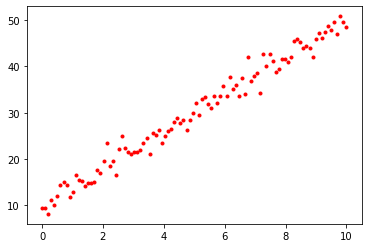

In [25]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# In our synthetic data, we have w = 4 and b = 10
N = 100  # Number of training data points
x = np.linspace(0, 10, N)

t = 4 * x + 10 + np.random.normal(0, 2, x.shape[0])
plt.plot(x, t, "r.")

x = torch.from_numpy(x)
t = torch.from_numpy(t)

### Gradient descent

In [44]:
# Initialize random parameters
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# define cost function
def cost(w, b):
    y = w * x + b
    return (1 / N) * torch.sum( (y - t) ** 2)


# Find the gradient of the cost function using pytorch
num_iterations = 1000 # Number of iterations
lr = 0.01  # Learning rate

for i in range(num_iterations):

    # Evaluate the gradient of the current parameters stored in params
    loss = cost(w, b)
    loss.backward()

    if i % 100 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")

    # Update parameters w and b
    with torch.no_grad():

        w.data = w - lr * w.grad
        b.data = b - lr * b.grad

        w.grad.zero_()  # we set the gradients to zero before the next iteration
        b.grad.zero_()

i: 0     loss: 1083.7414
i: 100   loss: 10.4761
i: 200   loss: 5.7141
i: 300   loss: 3.9540
i: 400   loss: 3.3034
i: 500   loss: 3.0629
i: 600   loss: 2.9740
i: 700   loss: 2.9412
i: 800   loss: 2.9290
i: 900   loss: 2.9246


Seems that the loss has converged to some minimum. Let's see what the values of $w$ and $b$ are:   

In [45]:
w, b

(tensor([4.0257], requires_grad=True), tensor([9.8727], requires_grad=True))

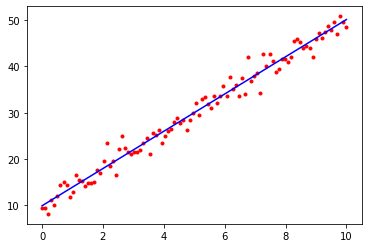

In [46]:
# Plot the training data again, together with the line defined by y = wx + b
# where w and b are our final learned parameters
b_numpy = b.detach().numpy()
w_numpy = w.detach().numpy()

plt.plot(x, t, "r.")
plt.plot([0, 10], [b_numpy, w_numpy * 10 + b_numpy], "b-")

**Exercise**: Try to change the learning rate and see what happens.

**Exercise** now try to fit the linear model to the data generated by the following model:

$$
t = x^4 - 10 x^2 + 10 x + \epsilon
$$

where $\epsilon \sim \mathcal{N}(0, 4)$.

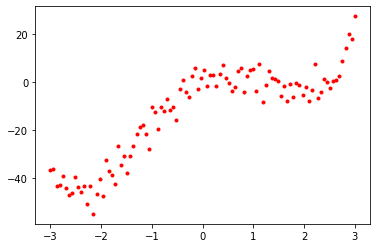

In [50]:
# Generate synthetic data
N = 100  # Number of data points
x = np.linspace(-3, 3, N)  # Generate N values linearly-spaced between -3 and 3


t = x ** 4 - 10 * x ** 2 + 10 * x + np.random.normal(0, 4, x.shape[0])  # Generate corresponding targets
plt.plot(x, t, "r.")  # Plot data points

t = torch.from_numpy(t).view(-1, 1)

x = torch.from_numpy(x)
#t = torch.from_numpy(t)

In [59]:
# Initialize random parameters
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# define cost function
def cost(w, b):
    y = w * x ** 4 + b
    return (1 / N) * torch.sum( (y - t) ** 2)


# Find the gradient of the cost function using pytorch
num_iterations = 100000 # Number of iterations
lr = 1e-6  # Learning rate

for i in range(num_iterations):

    # Evaluate the gradient of the current parameters stored in params
    loss = cost(w, b)
    loss.backward()

    if i % 100 == 0:
        print(f"i: {i:<5d} loss: {loss.item():.4f}")

    # Update parameters w and b
    with torch.no_grad():

        w.data = w - lr * w.grad
        b.data = b - lr * b.grad

        w.grad.zero_()  # we set the gradients to zero before the next iteration
        b.grad.zero_()





i: 0     loss: 97622.5119
i: 100   loss: 46004.2520
i: 200   loss: 45784.1475
i: 300   loss: 45569.6026
i: 400   loss: 45360.4767
i: 500   loss: 45156.6328
i: 600   loss: 44957.9377
i: 700   loss: 44764.2617
i: 800   loss: 44575.4765
i: 900   loss: 44391.4601
i: 1000  loss: 44212.0918
i: 1100  loss: 44037.2535
i: 1200  loss: 43866.8315
i: 1300  loss: 43700.7138
i: 1400  loss: 43538.7917
i: 1500  loss: 43380.9597
i: 1600  loss: 43227.1140
i: 1700  loss: 43077.1542
i: 1800  loss: 42930.9821
i: 1900  loss: 42788.5020
i: 2000  loss: 42649.6205
i: 2100  loss: 42514.2473
i: 2200  loss: 42382.2926
i: 2300  loss: 42253.6711
i: 2400  loss: 42128.2988
i: 2500  loss: 42006.0929
i: 2600  loss: 41886.9731
i: 2700  loss: 41770.8629
i: 2800  loss: 41657.6860
i: 2900  loss: 41547.3663
i: 3000  loss: 41439.8325
i: 3100  loss: 41335.0155
i: 3200  loss: 41232.8459
i: 3300  loss: 41133.2565
i: 3400  loss: 41036.1829
i: 3500  loss: 40941.5608
i: 3600  loss: 40849.3295
i: 3700  loss: 40759.4267
i: 3800  los

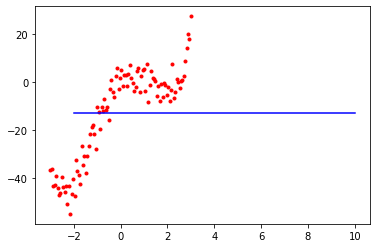

In [55]:
b_numpy = b.detach().numpy()
w_numpy = w.detach().numpy()

plt.plot(x, t, "r.")
plt.plot([-2, 10], [b_numpy, w_numpy * 10 + b_numpy], "b-")

### Exercise: Automatic Differentiation in Finance: call option pricing and derivatives

Let's consider the following model for the price of a call option, which uses the Black-Scholes formula, with the following variables:

* $K$ is the strike price of the option
* $S_t$ is the price of the underlying asset at time $t$
* $t$ is the current time in years
* $T$ time of option expiration in years
* $\sigma$ is the standard deviation of the asset returns
* $r$ is the risk-free interest rate (annualized)
* $N(x)$ is the cumulative distribution function of the standard normal distribution


$$
C(S_t, t) = N(d_1) S_t - N(d_2) K e^{-r(T-t)}
$$
$$
d_1 = \frac{1}{\sigma\sqrt{T-t}}[\ln(\frac{S_t}{K}) + (r + \frac{\sigma^2}{2})(T-t)]
$$
$$
d_2 = d_1 - \sigma\sqrt{T-t}
$$

1. Implement the previous function to compute the price C of a call option:

In [1]:
from torch.distributions import Normal
import torch

std_norm_cdf = Normal(0, 1).cdf   # you can use this for the cdf of the standard normal distribution

In [68]:
def call_option_price_(K, S, T, sigma, r):
    d1 = 1 / (sigma*torch.sqrt(T)) * (torch.log(S/K) + (r + 0.5*sigma**2)*T)
    d2 = d1 - sigma*torch.sqrt(T)
    price = std_norm_cdf(d1)*S - std_norm_cdf(d2)*K*torch.exp(-r*T)
    return price

# this is the same as the previous one, it does not matter if we use auxiliary variables
def call_option_price(K, S, T, sigma, r):
    d1 = 1 / (sigma*torch.sqrt(T)) * (torch.log(S/K) + (r + 0.5*sigma**2)*T)
    price = std_norm_cdf(d1)*S - std_norm_cdf(d1 - sigma*torch.sqrt(T))*K*torch.exp(-r*T)
    return price



 2. Calculate the price of a call option with the underyling at 100, strike price at 100, 1 year to expiration, 5% annual volatility, and a risk-free rate of 1% annually.

In [69]:
S = torch.tensor(100)
K = torch.tensor(100)
T = torch.tensor(1)
sigma = torch.tensor(0.05)
r = torch.tensor(0.01)

price = call_option_price(K=K, S=S, T=T, sigma=sigma, r=r)
price


tensor(2.5216)

The **greeks** are the partial derivatives of the option price with respect to the different parameters. They are used to hedge the risk of the option.

https://en.wikipedia.org/wiki/Greeks_(finance)


3. Compute the greeks Delta, Vega, Theta and Rho for the previous values of the option.

In [70]:
S = torch.tensor(100.0, requires_grad=True)
K = torch.tensor(100.0, requires_grad=True)
T = torch.tensor(1.0, requires_grad=True)
sigma = torch.tensor(0.05, requires_grad=True)
r = torch.tensor(0.01, requires_grad=True)

price = call_option_price(K=K, S=S, T=T, sigma=sigma, r=r)


price.backward()

print("Delta:", S.grad)
print(K.grad)
print(T.grad)
print(sigma.grad)
print(r.grad)

Delta: tensor(0.5890)
tensor(-0.5638)
tensor(1.5362)
tensor(38.8971)
tensor(56.3794)
